In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Loading the dataset
data = pd.read_csv('default_plus_chromatic_features_1059_tracks_new.csv', header=None)
labels_df = data.iloc[:,-1] # splitting the class column, this is used for evaluation of the model
data = data.iloc[:,:-1]

# Converting string labels to numbers.
lb = LabelEncoder()
labels = lb.fit_transform(labels_df)


([<matplotlib.axis.XTick at 0x7fb182a9c390>,
 <a list of 2 Text xticklabel objects>)

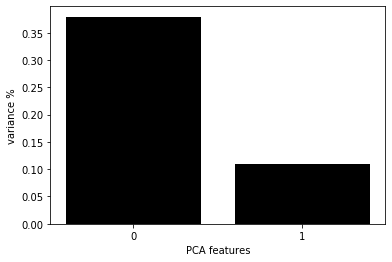

In [3]:
# Question 2
comp = [2, 4, 8, 16, 32]
#rand = []
p_r = []

pca = PCA(n_components=2)
plt_x = StandardScaler().fit_transform(data)
plt_x = pca.fit_transform(plt_x)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

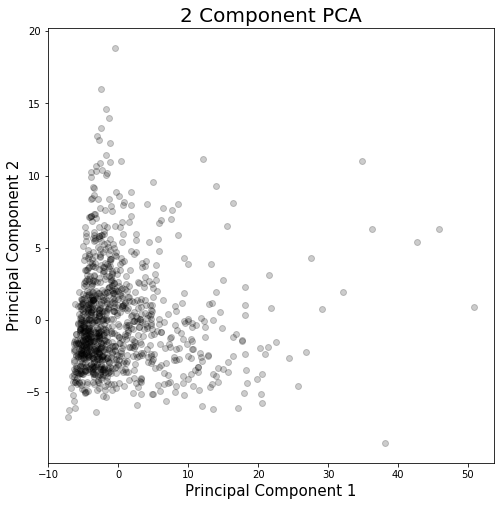

In [4]:
principalDf = pd.DataFrame(data = plt_x, columns = ['principal component 1', 'principal component 2'])

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

ax.scatter(principalDf.iloc[:,0],principalDf.iloc[:,1],alpha=.2,color='black')


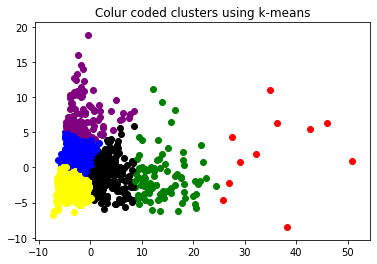

In [5]:
kmeans = KMeans(init='random',n_clusters= 6,max_iter=200) # choosig 6 clusters, based on the SSE graph
clusts = kmeans.fit_predict(plt_x)

for i in range(0, len(clusts)):
    if clusts[i] == 0:
        c1 = plt.scatter(plt_x[i,0],plt_x[i,1],c='r', marker='o')
    elif clusts[i] == 1:
        c2 = plt.scatter(plt_x[i,0],plt_x[i,1],c='g',marker='o')
    elif clusts[i] == 2:
        c3 = plt.scatter(plt_x[i,0],plt_x[i,1],c='b',marker='o')
    elif clusts[i] == 3:
        c4 = plt.scatter(plt_x[i,0],plt_x[i,1],c='black',marker='o')
    elif clusts[i] == 4:
        c5 = plt.scatter(plt_x[i,0],plt_x[i,1],c='purple',marker='o')
    elif clusts[i] == 5:
        c6 = plt.scatter(plt_x[i,0],plt_x[i,1],c='yellow',marker='o')
        
plt.title('Colur coded clusters using k-means')
# plt.savefig('Colour_coded_clusters.png')
plt.show()

In [6]:
for i in comp:
    pca = PCA(n_components=i)
    st_data = StandardScaler().fit_transform(data)
    pca_result = pca.fit_transform(st_data)
    kmeans_res = kmeans.fit(pca_result)
    p_r.append(metrics.adjusted_rand_score(labels,kmeans.labels_))
    print("for pca {1} pca components \n  Adjusted rand score: {0} \n".format(metrics.adjusted_rand_score(labels,kmeans.labels_),i))


for pca 2 pca components 
  Adjusted rand score: 0.02037822132069955 

for pca 4 pca components 
  Adjusted rand score: 0.02631033451361833 

for pca 8 pca components 
  Adjusted rand score: 0.02621057096454939 

for pca 16 pca components 
  Adjusted rand score: 0.02661044732622029 

for pca 32 pca components 
  Adjusted rand score: 0.024260141414034424 



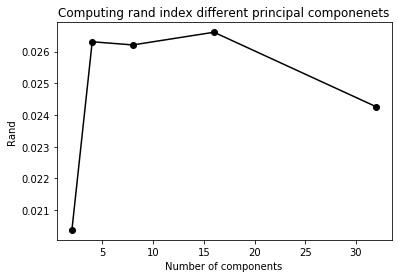

In [7]:
plt.plot(comp, p_r , 'o-',color='black' ,label="rand")
plt.title("Computing rand index different principal componenets")
plt.xlabel("Number of components")
plt.ylabel("Rand")
# plt.savefig("RandScore_for_diff_PCA_comp.png")
plt.show()